# Deep Learning Section
**Section Description...**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline
from modules.preprocess import PreprocessAPA

In [2]:
full_ml = pd.read_csv("/Users/ibragimzhussup/Desktop/APA_Lab/src/data/full_text.csv")

In [3]:
from modules.ML_models import ML_Models
ml_modeling = ML_Models()
preproc = PreprocessAPA()
train, test, val = preproc.split_data(full_ml, test_val=True, n_samples_train=500, test_split_ratio=0.5)
train[['labels', 'label_ids']].drop_duplicates().sort_values(by='label_ids')

,labels,label_ids
353,interview,0
905,NONRELEVANT,1
1333,letter,2
1860,comment,3


## Recurrent Neural Networks (LSTM)
### Google NNLM 50 Dimensions
#### Optimizer ADAM

In [4]:
import tensorflow as tf
import tensorflow_hub as hub
hub_layer_de_50 = hub.KerasLayer("https://www.kaggle.com/models/google/nnlm/frameworks/TensorFlow2/variations/de-dim50/versions/1",
                            dtype=tf.string, trainable=False, input_shape=[])
hub_layer_de_128 = hub.KerasLayer("https://www.kaggle.com/models/google/nnlm/frameworks/TensorFlow2/variations/de-dim128/versions/1",
                            dtype=tf.string, trainable=False, input_shape=[])

2024-05-02 20:17:52.480540: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
from modules.DL_models import RNN, CNN

In [20]:
lstm = RNN()
lstm.embedding = hub_layer_de_50
lstm.tokenize(train, test, val)
X_train, X_test, X_val, y_train, y_test, y_val = lstm.pad_and_label_preproc()
lstm_model, early_stop = lstm.build_model(use_basic_embed=False, optimizer="adam", reshape=50)

Attributes updated, use <self.train_seq> etc. to use values
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48948250  
                                                                 
 reshape_2 (Reshape)         (None, 1, 50)             0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 1, 256)            183296    
 onal)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 1, 256)            0         
                                                                 
 global_max_pooling1d_2 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                            

In [21]:
lstm_model.fit(train['text'], y_train, batch_size=64,
               epochs=100, callbacks=[early_stop], validation_data=(test['text'],
                                                                    y_test))

Epoch 1/100
32/32 [==============================] - 16s 313ms/step - loss: 1.2988 - accuracy: 0.3025 - val_loss: 1.4062 - val_accuracy: 0.4837
Epoch 2/100
32/32 [==============================] - 7s 229ms/step - loss: 1.1055 - accuracy: 0.5325 - val_loss: 1.1411 - val_accuracy: 0.7037
Epoch 3/100
32/32 [==============================] - 7s 232ms/step - loss: 0.9141 - accuracy: 0.6135 - val_loss: 0.8226 - val_accuracy: 0.7571
Epoch 4/100
32/32 [==============================] - 7s 231ms/step - loss: 0.8269 - accuracy: 0.6610 - val_loss: 0.7138 - val_accuracy: 0.7569
Epoch 5/100
32/32 [==============================] - 7s 230ms/step - loss: 0.7713 - accuracy: 0.6950 - val_loss: 0.7454 - val_accuracy: 0.7159
Epoch 6/100
32/32 [==============================] - 7s 226ms/step - loss: 0.7413 - accuracy: 0.7025 - val_loss: 0.7364 - val_accuracy: 0.7092
Epoch 7/100
32/32 [==============================] - 7s 218ms/step - loss: 0.6923 - accuracy: 0.7405 - val_loss: 0.6902 - val_accuracy: 0.727

In [22]:
print("Test set")
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(lstm_model.predict(test['text']), axis=1)))
print("Validation set")
print(classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(lstm_model.predict(val['text']), axis=1)))

lstm_50embed_adam = classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(lstm_model.predict(val['text']), axis=1), output_dict=True)

Test set
2725/2725 [==============================] - 11s 4ms/step
              precision    recall  f1-score   support

           0       0.10      0.90      0.17       504
           1       0.99      0.73      0.84     84292
           2       0.10      0.56      0.17      2087
           3       0.03      0.92      0.06       312

    accuracy                           0.73     87195
   macro avg       0.31      0.78      0.31     87195
weighted avg       0.96      0.73      0.82     87195

Validation set
2725/2725 [==============================] - 10s 4ms/step
              precision    recall  f1-score   support

           0       0.11      0.87      0.19       564
           1       0.99      0.73      0.84     84352
           2       0.10      0.57      0.17      1963
           3       0.03      0.90      0.06       317

    accuracy                           0.73     87196
   macro avg       0.31      0.77      0.31     87196
weighted avg       0.97      0.73      0.82  

#### Optimizer SGD

In [14]:
lstm_model, early_stop = lstm.build_model(use_basic_embed=False, optimizer="sgd", reshape=50)
lstm_model.fit(train['text'], y_train, batch_size=64,
               epochs=100, callbacks=[early_stop], validation_data=(test['text'],
                                                                    y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48948250  
                                                                 
 reshape_1 (Reshape)         (None, 1, 50)             0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 1, 256)            183296    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 1, 256)            0         
                                                                 
 global_max_pooling1d_1 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_5 (Dropout)         (None, 256)              

In [18]:
print("Test set")
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(lstm_model.predict(test['text']), axis=1)))
print("Validation set")
print(classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(lstm_model.predict(val['text']), axis=1)))

lstm_50embed_sgd = classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(lstm_model.predict(val['text']), axis=1), output_dict=True)

Test set
2725/2725 [==============================] - 12s 4ms/step
              precision    recall  f1-score   support

           0       0.07      0.88      0.13       504
           1       0.99      0.77      0.86     84292
           2       0.15      0.41      0.22      2087
           3       0.01      0.41      0.03       312

    accuracy                           0.76     87195
   macro avg       0.31      0.62      0.31     87195
weighted avg       0.96      0.76      0.84     87195

Validation set
2725/2725 [==============================] - 12s 4ms/step
              precision    recall  f1-score   support

           0       0.08      0.87      0.15       564
           1       0.99      0.77      0.87     84352
           2       0.13      0.39      0.20      1963
           3       0.02      0.49      0.03       317

    accuracy                           0.76     87196
   macro avg       0.30      0.63      0.31     87196
weighted avg       0.96      0.76      0.84  

### Google NNLM 128
#### Optimizer ADAM

In [24]:
lstm.embedding = hub_layer_de_128
lstm_model, early_stop = lstm.build_model(use_basic_embed=False, optimizer="adam", reshape=128)
lstm_model.fit(train['text'], y_train, batch_size=64,
               epochs=100, callbacks=[early_stop], validation_data=(test['text'],
                                                                    y_test))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 128)               125307520 
                                                                 
 reshape_3 (Reshape)         (None, 1, 128)            0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 1, 256)            263168    
 onal)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 1, 256)            0         
                                                                 
 global_max_pooling1d_3 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_13 (Dropout)        (None, 256)              

In [25]:
print("Test set")
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(lstm_model.predict(test['text']), axis=1)))
print("Validation set")
print(classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(lstm_model.predict(val['text']), axis=1)))

lstm_128embed_adam = classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(lstm_model.predict(val['text']), axis=1), output_dict=True)

Test set
2725/2725 [==============================] - 14s 5ms/step
              precision    recall  f1-score   support

           0       0.08      0.91      0.15       504
           1       0.99      0.76      0.86     84292
           2       0.12      0.66      0.21      2087
           3       0.04      0.83      0.08       312

    accuracy                           0.76     87195
   macro avg       0.31      0.79      0.32     87195
weighted avg       0.96      0.76      0.84     87195

Validation set
2725/2725 [==============================] - 12s 4ms/step
              precision    recall  f1-score   support

           0       0.10      0.90      0.17       564
           1       0.99      0.76      0.86     84352
           2       0.12      0.66      0.20      1963
           3       0.04      0.80      0.07       317

    accuracy                           0.75     87196
   macro avg       0.31      0.78      0.33     87196
weighted avg       0.97      0.75      0.84  

In [26]:
lstm_model, early_stop = lstm.build_model(use_basic_embed=False, optimizer="sgd", reshape=128)
lstm_model.fit(train['text'], y_train, batch_size=64,
               epochs=100, callbacks=[early_stop], validation_data=(test['text'],
                                                                    y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 128)               125307520 
                                                                 
 reshape_4 (Reshape)         (None, 1, 128)            0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 1, 256)            263168    
 onal)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 1, 256)            0         
                                                                 
 global_max_pooling1d_4 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_17 (Dropout)        (None, 256)              

In [27]:
print("Test set")
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(lstm_model.predict(test['text']), axis=1)))
print("Validation set")
print(classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(lstm_model.predict(val['text']), axis=1)))

lstm_128embed_sgd = classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(lstm_model.predict(val['text']), axis=1), output_dict=True)

Test set
2725/2725 [==============================] - 12s 4ms/step
              precision    recall  f1-score   support

           0       0.01      0.97      0.01       504
           1       0.99      0.10      0.18     84292
           2       0.01      0.00      0.01      2087
           3       0.00      0.00      0.00       312

    accuracy                           0.10     87195
   macro avg       0.25      0.27      0.05     87195
weighted avg       0.96      0.10      0.17     87195

Validation set
2725/2725 [==============================] - 12s 4ms/step
              precision    recall  f1-score   support

           0       0.01      0.98      0.01       564
           1       0.99      0.10      0.18     84352
           2       0.01      0.01      0.01      1963
           3       0.00      0.00      0.00       317

    accuracy                           0.10     87196
   macro avg       0.25      0.27      0.05     87196
weighted avg       0.96      0.10      0.17  

## Convolutional Neural Networks
### Google NNLM 50 
#### Optimizer ADAM
##### No Globalmaxpool

In [29]:
cnn = CNN()
cnn.embedding = hub_layer_de_50
cnn.tokenize(train, test, val)
X_train, X_test, X_val, y_train, y_test, y_val = cnn.pad_and_label_preproc()
cnn_model, early_stop = cnn.build_model(use_basic_embed=False, reshape=50, optimizer="adam", add_globalmaxpool=False)
cnn_model.fit(train['text'], y_train, batch_size=64,
               epochs=100, callbacks=[early_stop], validation_data=(test['text'],
                                                                    y_test))

Attributes updated, use <self.train_seq> etc. to use values
Using custom embedding
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48948250  
                                                                 
 reshape_5 (Reshape)         (None, 1, 50)             0         
                                                                 
 dropout_20 (Dropout)        (None, 1, 50)             0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            19328     
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 64)             24640     
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 32)             6176      
                                     

In [30]:
print("Test set")
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(cnn_model.predict(test['text']), axis=1)))
print("Validation set")
print(classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1)))

cnn_50embed_adam = classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1), output_dict=True)

Test set
2725/2725 [==============================] - 12s 4ms/step
              precision    recall  f1-score   support

           0       0.11      0.86      0.19       504
           1       0.99      0.72      0.84     84292
           2       0.11      0.64      0.19      2087
           3       0.02      0.72      0.04       312

    accuracy                           0.72     87195
   macro avg       0.31      0.74      0.32     87195
weighted avg       0.96      0.72      0.82     87195

Validation set
2725/2725 [==============================] - 12s 4ms/step
              precision    recall  f1-score   support

           0       0.12      0.85      0.21       564
           1       0.99      0.72      0.84     84352
           2       0.10      0.64      0.18      1963
           3       0.02      0.72      0.05       317

    accuracy                           0.72     87196
   macro avg       0.31      0.74      0.32     87196
weighted avg       0.97      0.72      0.82  

##### with Globalmaxpool

In [31]:
cnn_model, early_stop = cnn.build_model(use_basic_embed=False, reshape=50, optimizer="adam", add_globalmaxpool=True)
cnn_model.fit(train['text'], y_train, batch_size=64,
               epochs=100, callbacks=[early_stop], validation_data=(test['text'],
                                                                    y_test))

Using custom embedding
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48948250  
                                                                 
 reshape_6 (Reshape)         (None, 1, 50)             0         
                                                                 
 dropout_22 (Dropout)        (None, 1, 50)             0         
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 128)            19328     
                                                                 
 conv1d_4 (Conv1D)           (None, 1, 64)             24640     
                                                                 
 conv1d_5 (Conv1D)           (None, 1, 32)             6176      
                                                                 
 global_max_pooling1d_5 (Gl  (N

In [32]:
print("Test set")
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(cnn_model.predict(test['text']), axis=1)))
print("Validation set")
print(classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1)))

cnn_50embed_adam_global = classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1), output_dict=True)

Test set
2725/2725 [==============================] - 13s 5ms/step
              precision    recall  f1-score   support

           0       0.08      0.91      0.14       504
           1       1.00      0.69      0.82     84292
           2       0.11      0.68      0.18      2087
           3       0.03      0.84      0.05       312

    accuracy                           0.69     87195
   macro avg       0.30      0.78      0.30     87195
weighted avg       0.97      0.69      0.79     87195

Validation set
2725/2725 [==============================] - 13s 5ms/step
              precision    recall  f1-score   support

           0       0.09      0.90      0.16       564
           1       1.00      0.69      0.82     84352
           2       0.10      0.67      0.17      1963
           3       0.03      0.82      0.05       317

    accuracy                           0.69     87196
   macro avg       0.30      0.77      0.30     87196
weighted avg       0.97      0.69      0.79  

#### Optimizer SGD
##### No Globalmaxpool

In [33]:
cnn_model, early_stop = cnn.build_model(use_basic_embed=False, reshape=50, optimizer="sgd", add_globalmaxpool=False)
cnn_model.fit(train['text'], y_train, batch_size=64,
               epochs=100, callbacks=[early_stop], validation_data=(test['text'],
                                                                    y_test))

Using custom embedding
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48948250  
                                                                 
 reshape_7 (Reshape)         (None, 1, 50)             0         
                                                                 
 dropout_24 (Dropout)        (None, 1, 50)             0         
                                                                 
 conv1d_6 (Conv1D)           (None, 1, 128)            19328     
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 64)             24640     
                                                                 
 conv1d_8 (Conv1D)           (None, 1, 32)             6176      
                                                                 
 flatten_2 (Flatten)         (N

In [34]:
print("Test set")
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(cnn_model.predict(test['text']), axis=1)))
print("Validation set")
print(classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1)))

cnn_50embed_sgd = classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1), output_dict=True)

Test set
2725/2725 [==============================] - 9s 3ms/step
              precision    recall  f1-score   support

           0       0.01      0.99      0.01       504
           1       0.99      0.07      0.13     84292
           2       0.00      0.00      0.00      2087
           3       0.00      0.00      0.00       312

    accuracy                           0.08     87195
   macro avg       0.25      0.27      0.04     87195
weighted avg       0.96      0.08      0.13     87195

Validation set
2725/2725 [==============================] - 9s 3ms/step
              precision    recall  f1-score   support

           0       0.01      0.99      0.01       564
           1       0.99      0.07      0.13     84352
           2       0.01      0.01      0.01      1963
           3       0.00      0.00      0.00       317

    accuracy                           0.08     87196
   macro avg       0.25      0.27      0.04     87196
weighted avg       0.96      0.08      0.13    

##### with Globalmaxpool

In [35]:
cnn_model, early_stop = cnn.build_model(use_basic_embed=False, reshape=50, optimizer="sgd", add_globalmaxpool=True)
cnn_model.fit(train['text'], y_train, batch_size=64,
               epochs=100, callbacks=[early_stop], validation_data=(test['text'],
                                                                    y_test))

Using custom embedding
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48948250  
                                                                 
 reshape_8 (Reshape)         (None, 1, 50)             0         
                                                                 
 dropout_26 (Dropout)        (None, 1, 50)             0         
                                                                 
 conv1d_9 (Conv1D)           (None, 1, 128)            19328     
                                                                 
 conv1d_10 (Conv1D)          (None, 1, 64)             24640     
                                                                 
 conv1d_11 (Conv1D)          (None, 1, 32)             6176      
                                                                 
 global_max_pooling1d_6 (Gl  (N

In [36]:
print("Test set")
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(cnn_model.predict(test['text']), axis=1)))
print("Validation set")
print(classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1)))

cnn_50embed_sgd_global = classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1), output_dict=True)

Test set
2725/2725 [==============================] - 10s 4ms/step
              precision    recall  f1-score   support

           0       0.01      1.00      0.01       504
           1       0.99      0.01      0.01     84292
           2       0.03      0.00      0.00      2087
           3       0.00      0.00      0.00       312

    accuracy                           0.01     87195
   macro avg       0.25      0.25      0.01     87195
weighted avg       0.95      0.01      0.01     87195

Validation set
2725/2725 [==============================] - 11s 4ms/step
              precision    recall  f1-score   support

           0       0.01      1.00      0.01       564
           1       1.00      0.01      0.01     84352
           2       0.02      0.00      0.00      1963
           3       0.00      0.00      0.00       317

    accuracy                           0.01     87196
   macro avg       0.26      0.25      0.01     87196
weighted avg       0.96      0.01      0.01  

### Google NNLM 128
#### Optimizer ADAM
##### No Globalmaxpool

In [38]:
cnn.embedding = hub_layer_de_128
cnn_model, early_stop = cnn.build_model(use_basic_embed=False, reshape=128, optimizer="adam", add_globalmaxpool=False)
cnn_model.fit(train['text'], y_train, batch_size=64,
               epochs=100, callbacks=[early_stop], validation_data=(test['text'],
                                                                    y_test))

Using custom embedding
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 128)               125307520 
                                                                 
 reshape_10 (Reshape)        (None, 1, 128)            0         
                                                                 
 dropout_28 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_12 (Conv1D)          (None, 1, 128)            49280     
                                                                 
 conv1d_13 (Conv1D)          (None, 1, 64)             24640     
                                                                 
 conv1d_14 (Conv1D)          (None, 1, 32)             6176      
                                                                 
 flatten_4 (Flatten)         (

In [39]:
print("Test set")
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(cnn_model.predict(test['text']), axis=1)))
print("Validation set")
print(classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1)))

cnn_128embed_adam = classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1), output_dict=True)

Test set
2725/2725 [==============================] - 12s 4ms/step
              precision    recall  f1-score   support

           0       0.07      0.93      0.12       504
           1       0.99      0.78      0.87     84292
           2       0.14      0.60      0.23      2087
           3       0.05      0.78      0.09       312

    accuracy                           0.77     87195
   macro avg       0.31      0.77      0.33     87195
weighted avg       0.96      0.77      0.85     87195

Validation set
2725/2725 [==============================] - 12s 5ms/step
              precision    recall  f1-score   support

           0       0.08      0.92      0.14       564
           1       0.99      0.78      0.87     84352
           2       0.13      0.61      0.22      1963
           3       0.04      0.75      0.08       317

    accuracy                           0.77     87196
   macro avg       0.31      0.76      0.33     87196
weighted avg       0.97      0.77      0.85  

##### with Globalmaxpool

In [40]:
cnn_model, early_stop = cnn.build_model(use_basic_embed=False, reshape=128, optimizer="adam", add_globalmaxpool=True)
cnn_model.fit(train['text'], y_train, batch_size=64,
               epochs=100, callbacks=[early_stop], validation_data=(test['text'],
                                                                    y_test))

Using custom embedding
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 128)               125307520 
                                                                 
 reshape_11 (Reshape)        (None, 1, 128)            0         
                                                                 
 dropout_30 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_15 (Conv1D)          (None, 1, 128)            49280     
                                                                 
 conv1d_16 (Conv1D)          (None, 1, 64)             24640     
                                                                 
 conv1d_17 (Conv1D)          (None, 1, 32)             6176      
                                                                 
 global_max_pooling1d_7 (Gl  (

In [41]:
print("Test set")
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(cnn_model.predict(test['text']), axis=1)))
print("Validation set")
print(classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1)))

cnn_128embed_adam_global = classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1), output_dict=True)

Test set
2725/2725 [==============================] - 12s 4ms/step
              precision    recall  f1-score   support

           0       0.10      0.88      0.17       504
           1       0.99      0.81      0.89     84292
           2       0.15      0.58      0.24      2087
           3       0.03      0.59      0.06       312

    accuracy                           0.81     87195
   macro avg       0.32      0.72      0.34     87195
weighted avg       0.96      0.81      0.87     87195

Validation set
2725/2725 [==============================] - 10s 4ms/step
              precision    recall  f1-score   support

           0       0.11      0.86      0.19       564
           1       0.99      0.81      0.89     84352
           2       0.14      0.59      0.23      1963
           3       0.04      0.68      0.07       317

    accuracy                           0.81     87196
   macro avg       0.32      0.74      0.35     87196
weighted avg       0.96      0.81      0.87  

#### Optimizer SGD
##### no Globalmaxpool

In [42]:
cnn_model, early_stop = cnn.build_model(use_basic_embed=False, reshape=128, optimizer="sgd", add_globalmaxpool=False)
cnn_model.fit(train['text'], y_train, batch_size=64,
               epochs=100, callbacks=[early_stop], validation_data=(test['text'],
                                                                    y_test))

Using custom embedding
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 128)               125307520 
                                                                 
 reshape_12 (Reshape)        (None, 1, 128)            0         
                                                                 
 dropout_32 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_18 (Conv1D)          (None, 1, 128)            49280     
                                                                 
 conv1d_19 (Conv1D)          (None, 1, 64)             24640     
                                                                 
 conv1d_20 (Conv1D)          (None, 1, 32)             6176      
                                                                 
 flatten_6 (Flatten)         (

In [43]:
print("Test set")
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(cnn_model.predict(test['text']), axis=1)))
print("Validation set")
print(classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1)))

cnn_128embed_sgd = classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1), output_dict=True)

Test set
2725/2725 [==============================] - 10s 3ms/step
              precision    recall  f1-score   support

           0       0.04      0.90      0.07       504
           1       0.98      0.58      0.73     84292
           2       0.01      0.00      0.00      2087
           3       0.01      0.65      0.02       312

    accuracy                           0.57     87195
   macro avg       0.26      0.53      0.21     87195
weighted avg       0.95      0.57      0.71     87195

Validation set
2725/2725 [==============================] - 9s 3ms/step
              precision    recall  f1-score   support

           0       0.04      0.89      0.08       564
           1       0.98      0.59      0.73     84352
           2       0.00      0.00      0.00      1963
           3       0.01      0.56      0.01       317

    accuracy                           0.57     87196
   macro avg       0.26      0.51      0.21     87196
weighted avg       0.95      0.57      0.71   

##### with Globalmaxpool

In [44]:
cnn_model, early_stop = cnn.build_model(use_basic_embed=False, reshape=128, optimizer="sgd", add_globalmaxpool=True)
cnn_model.fit(train['text'], y_train, batch_size=64,
               epochs=100, callbacks=[early_stop], validation_data=(test['text'],
                                                                    y_test))

Using custom embedding
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 128)               125307520 
                                                                 
 reshape_13 (Reshape)        (None, 1, 128)            0         
                                                                 
 dropout_34 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_21 (Conv1D)          (None, 1, 128)            49280     
                                                                 
 conv1d_22 (Conv1D)          (None, 1, 64)             24640     
                                                                 
 conv1d_23 (Conv1D)          (None, 1, 32)             6176      
                                                                 
 global_max_pooling1d_8 (Gl  (

In [45]:
print("Test set")
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(cnn_model.predict(test['text']), axis=1)))
print("Validation set")
print(classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1)))

cnn_128embed_sgd_global = classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1), output_dict=True)

Test set
2725/2725 [==============================] - 12s 4ms/step
              precision    recall  f1-score   support

           0       0.01      0.98      0.02       504
           1       0.99      0.11      0.20     84292
           2       0.01      0.03      0.02      2087
           3       0.00      0.00      0.00       312

    accuracy                           0.11     87195
   macro avg       0.25      0.28      0.06     87195
weighted avg       0.95      0.11      0.19     87195

Validation set
2725/2725 [==============================] - 11s 4ms/step
              precision    recall  f1-score   support

           0       0.01      0.99      0.02       564
           1       0.99      0.11      0.20     84352
           2       0.01      0.04      0.02      1963
           3       0.00      0.00      0.00       317

    accuracy                           0.11     87196
   macro avg       0.25      0.28      0.06     87196
weighted avg       0.95      0.11      0.19  

## Custom embedding models evaluation

In [52]:
names = ['lstm_50embed_adam', 'lstm_50embed_sgd', 'lstm_128embed_adam', 'lstm_128embed_sgd',
         'cnn_50embed_adam', 'cnn_50embed_adam_global', 'cnn_50embed_sgd', 'cnn_50embed_sgd_global',
         'cnn_128embed_adam', 'cnn_128embed_adam_global', 'cnn_128embed_sgd', 'cnn_128embed_sgd_global']
dicts = [lstm_50embed_adam, lstm_50embed_sgd, lstm_128embed_adam, lstm_128embed_sgd,
         cnn_50embed_adam, cnn_50embed_adam_global, cnn_50embed_sgd, cnn_50embed_sgd_global,
         cnn_128embed_adam, cnn_128embed_adam_global, cnn_128embed_sgd, cnn_128embed_sgd_global]

In [55]:
def dataframer(dict, name):
    data = pd.DataFrame(data={
        "Name": [name],
        "Accuracy": [dict['accuracy']],
        "Label0_F1": [dict['0']['f1-score']],
        "Label1_F1": [dict['1']['f1-score']],
        "Label2_F1": [dict['2']['f1-score']],
        "Label3_F1": [dict['3']['f1-score']],
        "Precision_Macro": [dict['macro avg']['precision']],
        "Recall_Macro": [dict['macro avg']['recall']],
        "F1_Macro": [dict['macro avg']['f1-score']],
        "Precision_Weighted": [dict['weighted avg']['f1-score']],
        "Recall_Weighted": [dict['weighted avg']['f1-score']],
        "F1_Weighted": [dict['weighted avg']['f1-score']]
    })
    return data

In [58]:
dfs = []
for i in range(len(names)):
    df = dataframer(dicts[i], names[i])
    dfs.append(df)

In [70]:
nn_data = pd.concat(dfs, axis=0).reset_index(drop=True)
nn_data

,Name,Accuracy,Label0_F1,Label1_F1,Label2_F1,Label3_F1,Precision_Macro,Recall_Macro,F1_Macro,Precision_Weighted,Recall_Weighted,F1_Weighted
0,lstm_50embed_adam,0.726226,0.189445,0.840886,0.166369,0.058836,0.307206,0.766165,0.313884,0.818644,0.818644,0.818644
1,lstm_50embed_sgd,0.761927,0.149136,0.865418,0.196547,0.031441,0.303970,0.628691,0.310636,0.842695,0.842695,0.842695
2,lstm_128embed_adam,0.754369,0.172502,0.858598,0.197038,0.074053,0.311125,0.779858,0.325548,0.836415,0.836415,0.836415
3,lstm_128embed_sgd,0.100108,0.014214,0.176451,0.007463,0.000000,0.252728,0.269403,0.049532,0.170956,0.170956,0.170956
4,cnn_50embed_adam,0.721868,0.211687,0.837092,0.180161,0.045154,0.310802,0.735172,0.318523,0.815378,0.815378,0.815378
5,cnn_50embed_adam_global,0.691947,0.158616,0.815369,0.171354,0.053462,0.302010,0.771321,0.299700,0.793853,0.793853,0.793853
6,cnn_50embed_sgd,0.076632,0.014099,0.134962,0.007031,0.000000,0.250651,0.267356,0.039023,0.130810,0.130810,0.130810
7,cnn_50embed_sgd_global,0.012157,0.013850,0.011668,0.000991,0.000000,0.255283,0.251594,0.006627,0.011399,0.011399,0.011399
8,cnn_128embed_adam,0.773682,0.139666,0.871987,0.216104,0.084517,0.311438,0.764346,0.328069,0.849622,0.849622,0.849622
9,cnn_128embed_adam_global,0.807411,0.191095,0.893811,0.227505,0.074666,0.320243,0.735171,0.346769,0.871287,0.871287,0.871287


In [71]:
nn_data['Model_name'] = nn_data['Name'].apply(lambda x: x.split("_")[0])
nn_data['N_embed'] = nn_data['Name'].apply(lambda x: x.split("_")[1])
nn_data['Optimizer'] = nn_data['Name'].apply(lambda x: x.split("_")[2])
nn_data['Globalmaxpool'] = nn_data['Name'].apply(lambda x: True if "global" in x.lower().split("_") else False)
nn_data.set_index("Name", inplace=True)


In [72]:
nn_data

,Accuracy,Label0_F1,Label1_F1,Label2_F1,Label3_F1,Precision_Macro,Recall_Macro,F1_Macro,Precision_Weighted,Recall_Weighted,F1_Weighted,Model_name,N_embed,Optimizer,Globalmaxpool
Name,,,,,,,,,,,,,,,
lstm_50embed_adam,0.726226,0.189445,0.840886,0.166369,0.058836,0.307206,0.766165,0.313884,0.818644,0.818644,0.818644,lstm,50embed,adam,False
lstm_50embed_sgd,0.761927,0.149136,0.865418,0.196547,0.031441,0.303970,0.628691,0.310636,0.842695,0.842695,0.842695,lstm,50embed,sgd,False
lstm_128embed_adam,0.754369,0.172502,0.858598,0.197038,0.074053,0.311125,0.779858,0.325548,0.836415,0.836415,0.836415,lstm,128embed,adam,False
lstm_128embed_sgd,0.100108,0.014214,0.176451,0.007463,0.000000,0.252728,0.269403,0.049532,0.170956,0.170956,0.170956,lstm,128embed,sgd,False
cnn_50embed_adam,0.721868,0.211687,0.837092,0.180161,0.045154,0.310802,0.735172,0.318523,0.815378,0.815378,0.815378,cnn,50embed,adam,False
cnn_50embed_adam_global,0.691947,0.158616,0.815369,0.171354,0.053462,0.302010,0.771321,0.299700,0.793853,0.793853,0.793853,cnn,50embed,adam,True
cnn_50embed_sgd,0.076632,0.014099,0.134962,0.007031,0.000000,0.250651,0.267356,0.039023,0.130810,0.130810,0.130810,cnn,50embed,sgd,False
cnn_50embed_sgd_global,0.012157,0.013850,0.011668,0.000991,0.000000,0.255283,0.251594,0.006627,0.011399,0.011399,0.011399,cnn,50embed,sgd,True
cnn_128embed_adam,0.773682,0.139666,0.871987,0.216104,0.084517,0.311438,0.764346,0.328069,0.849622,0.849622,0.849622,cnn,128embed,adam,False


In [90]:
cols = list(nn_data.columns[:11])
cols

['Accuracy',
 'Label0_F1',
 'Label1_F1',
 'Label2_F1',
 'Label3_F1',
 'Precision_Macro',
 'Recall_Macro',
 'F1_Macro',
 'Precision_Weighted',
 'Recall_Weighted',
 'F1_Weighted']

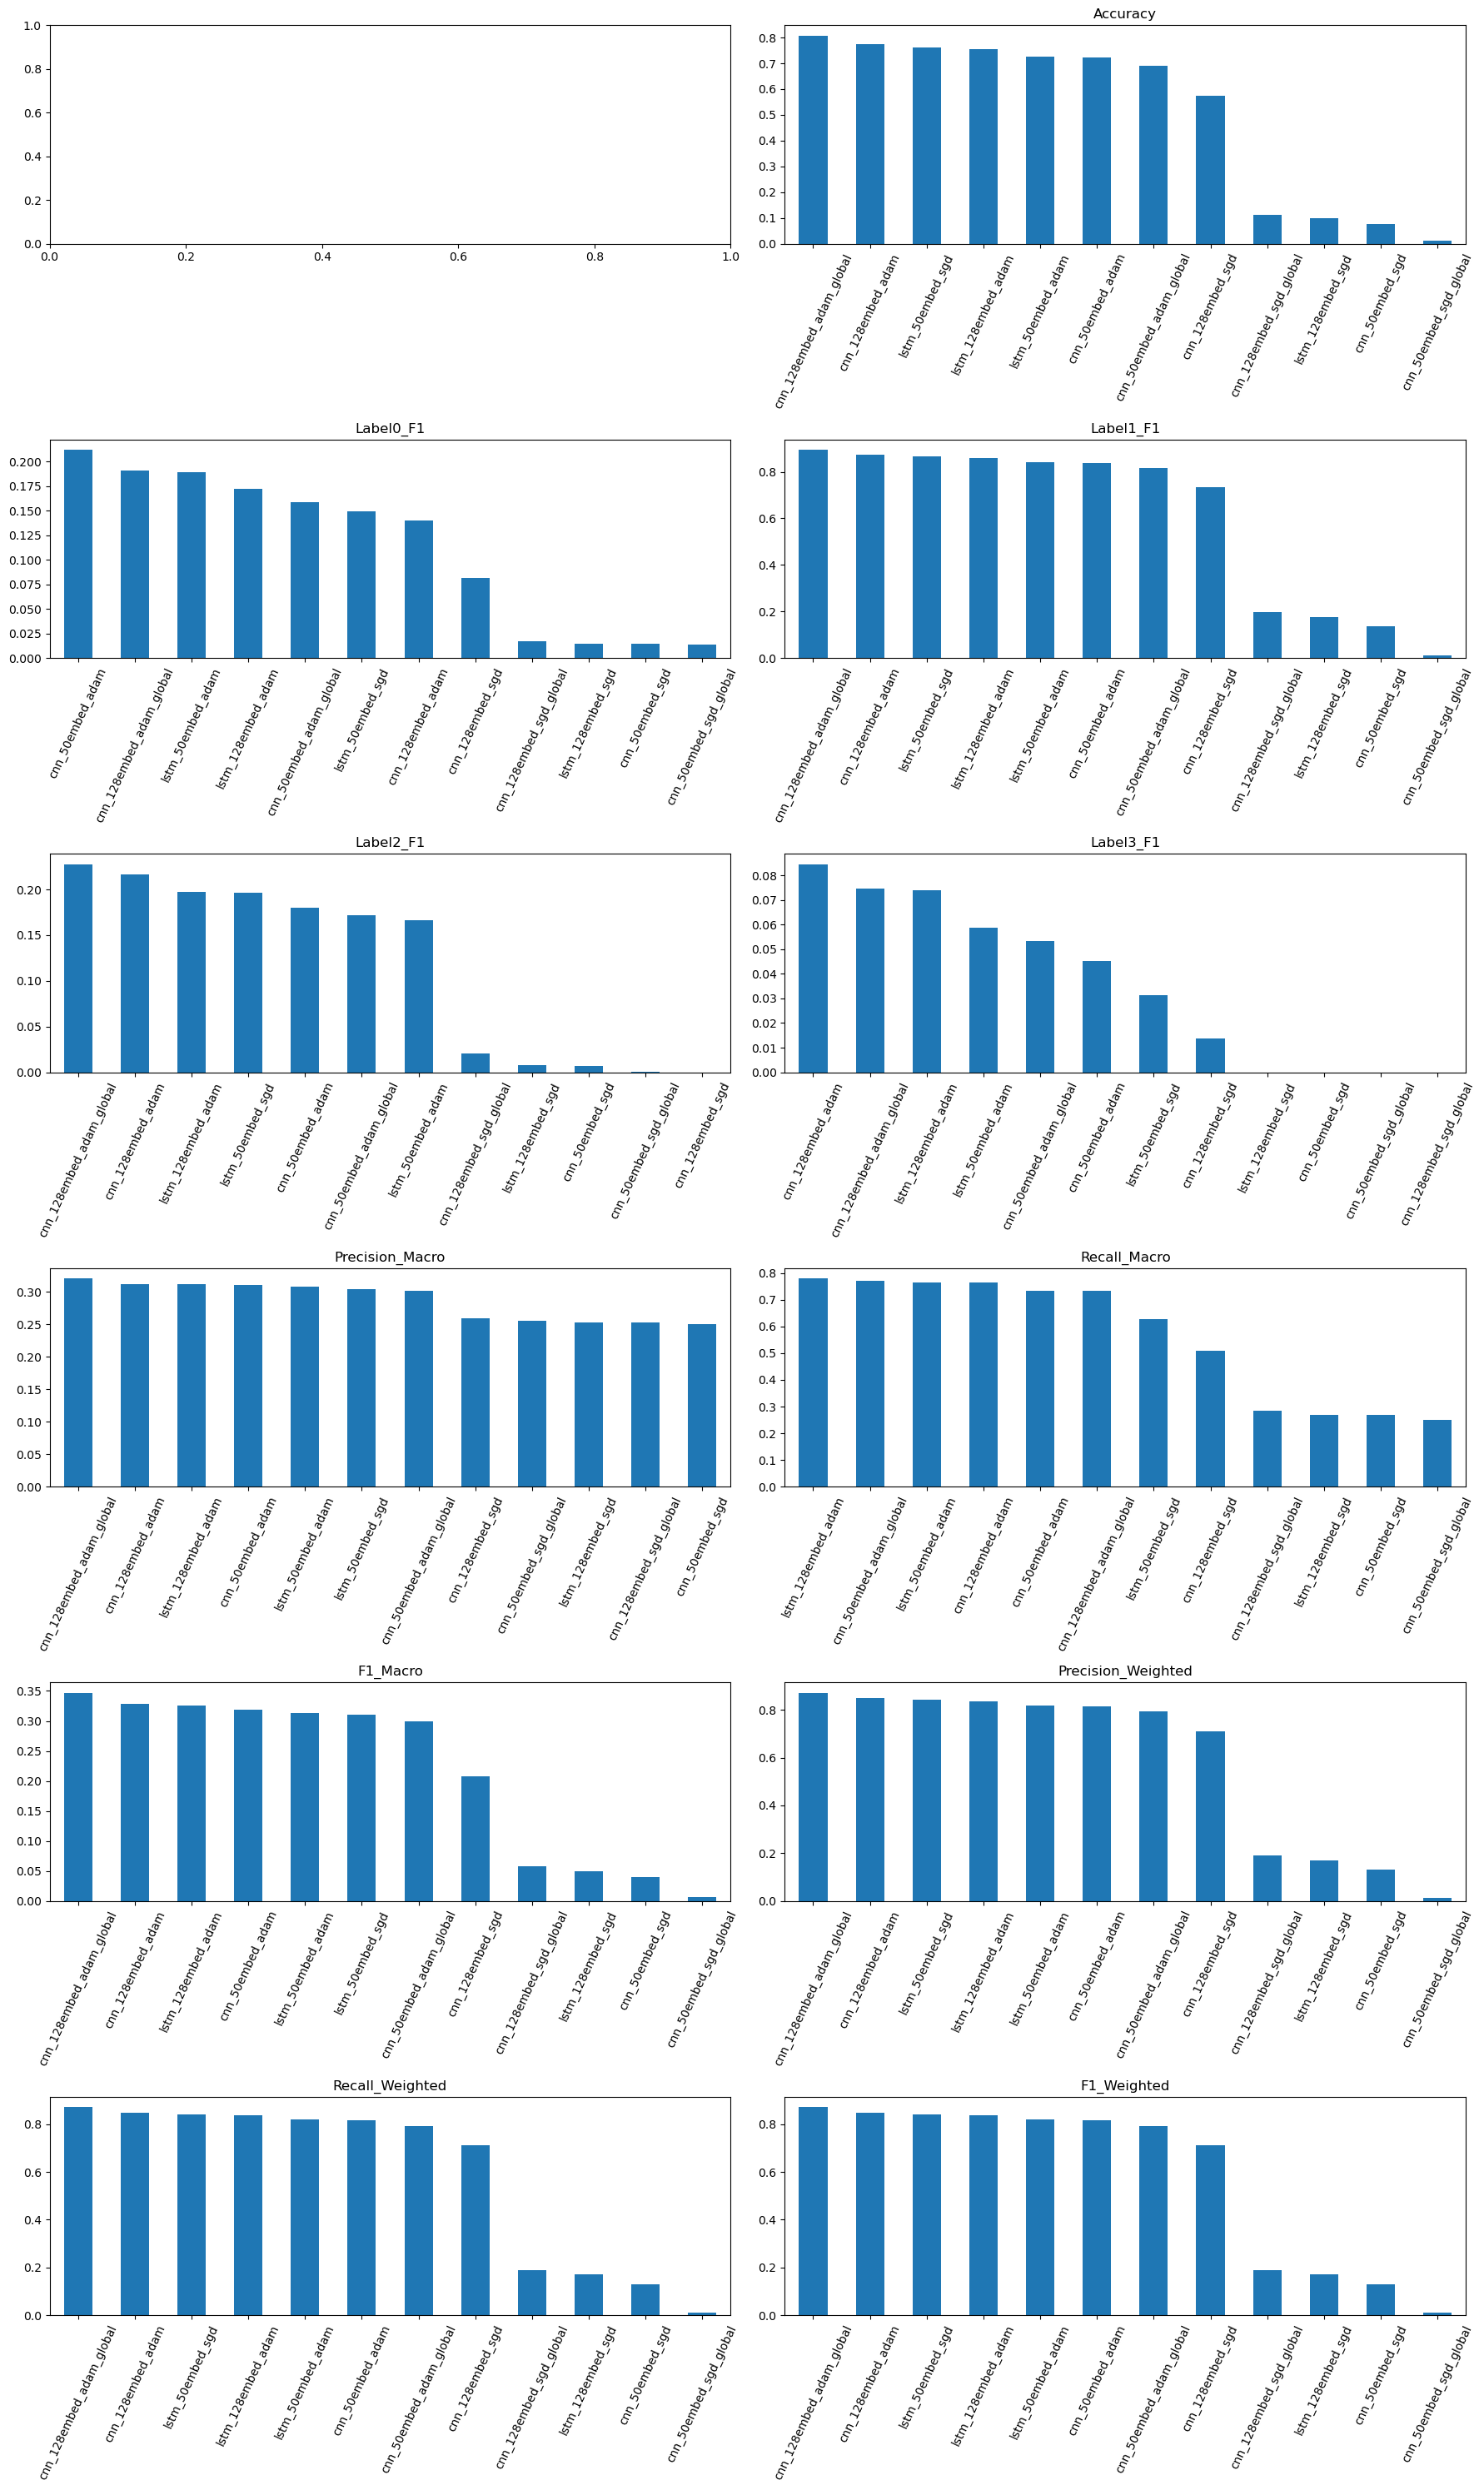

In [93]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(18,30))

row = 0
col_index = 1

for i in range(len(cols)):
    # Plotting the data
    nn_data[cols[i]].sort_values(ascending=False).plot(kind='bar', rot=65, ax=ax[row, col_index], title=cols[i], xlabel="")
    
    col_index = 1 - col_index
    if col_index == 0:
        row += 1

plt.tight_layout()
    

In [102]:
top3_df = pd.DataFrame(columns=['name', 'top1', 'top2', 'top3'])

for col in cols:
    print(col)
    top_indices = list(nn_data[col].sort_values(ascending=False).head(3).index)
    print(top_indices)

    top_values = [nn_data[col][index] for index in top_indices]
    new_row_df = pd.DataFrame({
        'name': [col], 
        'top1': [top_indices[0]], 
        'top2': [top_indices[1]], 
        'top3': [top_indices[2]]
    })
    
    top3_df = pd.concat([top3_df, new_row_df], ignore_index=True)


Accuracy
['cnn_128embed_adam_global', 'cnn_128embed_adam', 'lstm_50embed_sgd']
Label0_F1
['cnn_50embed_adam', 'cnn_128embed_adam_global', 'lstm_50embed_adam']
Label1_F1
['cnn_128embed_adam_global', 'cnn_128embed_adam', 'lstm_50embed_sgd']
Label2_F1
['cnn_128embed_adam_global', 'cnn_128embed_adam', 'lstm_128embed_adam']
Label3_F1
['cnn_128embed_adam', 'cnn_128embed_adam_global', 'lstm_128embed_adam']
Precision_Macro
['cnn_128embed_adam_global', 'cnn_128embed_adam', 'lstm_128embed_adam']
Recall_Macro
['lstm_128embed_adam', 'cnn_50embed_adam_global', 'lstm_50embed_adam']
F1_Macro
['cnn_128embed_adam_global', 'cnn_128embed_adam', 'lstm_128embed_adam']
Precision_Weighted
['cnn_128embed_adam_global', 'cnn_128embed_adam', 'lstm_50embed_sgd']
Recall_Weighted
['cnn_128embed_adam_global', 'cnn_128embed_adam', 'lstm_50embed_sgd']
F1_Weighted
['cnn_128embed_adam_global', 'cnn_128embed_adam', 'lstm_50embed_sgd']


In [114]:
top3_df['top1'].value_counts(), top3_df['top2'].value_counts()

(top1
 cnn_128embed_adam_global    8
 cnn_50embed_adam            1
 cnn_128embed_adam           1
 lstm_128embed_adam          1
 Name: count, dtype: int64,
 top2
 cnn_128embed_adam           8
 cnn_128embed_adam_global    2
 cnn_50embed_adam_global     1
 Name: count, dtype: int64)

**Convolutional Neural Network with 128 Dim Embedding with Adam Optimizer including the GlobalMaxPooling is 80% of times top1 model and 20% times top2 model across 10 criteria.**

**It is clearly the best model across NN models with custom embeddings**

**The next model in the queue is cnn_128embed_adam**

**Here are the results:**

In [118]:
cnn.embedding = hub_layer_de_128
cnn_model, early_stop = cnn.build_model(use_basic_embed=False, reshape=128, optimizer="adam", add_globalmaxpool=True)
cnn_model.fit(train['text'], y_train, batch_size=64,
               epochs=100, callbacks=[early_stop], validation_data=(test['text'],
                                                                    y_test))

Using custom embedding
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 128)               125307520 
                                                                 
 reshape_15 (Reshape)        (None, 1, 128)            0         
                                                                 
 dropout_38 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_27 (Conv1D)          (None, 1, 128)            49280     
                                                                 
 conv1d_28 (Conv1D)          (None, 1, 64)             24640     
                                                                 
 conv1d_29 (Conv1D)          (None, 1, 32)             6176      
                                                                 
 global_max_pooling1d_10 (G  (

In [119]:
print("Test set")
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(cnn_model.predict(test['text']), axis=1)))
print("Validation set")
print(classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1)))

Test set
2725/2725 [==============================] - 11s 4ms/step
              precision    recall  f1-score   support

           0       0.07      0.93      0.12       504
           1       0.99      0.76      0.86     84292
           2       0.14      0.65      0.23      2087
           3       0.04      0.75      0.08       312

    accuracy                           0.76     87195
   macro avg       0.31      0.78      0.32     87195
weighted avg       0.96      0.76      0.84     87195

Validation set
2725/2725 [==============================] - 10s 4ms/step
              precision    recall  f1-score   support

           0       0.07      0.92      0.14       564
           1       0.99      0.76      0.86     84352
           2       0.13      0.65      0.21      1963
           3       0.04      0.74      0.08       317

    accuracy                           0.76     87196
   macro avg       0.31      0.77      0.32     87196
weighted avg       0.97      0.76      0.84  

In [120]:
cnn_model, early_stop = cnn.build_model(use_basic_embed=False, reshape=128, optimizer="adam", add_globalmaxpool=False)
cnn_model.fit(train['text'], y_train, batch_size=64,
               epochs=100, callbacks=[early_stop], validation_data=(test['text'],
                                                                    y_test))

Using custom embedding
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 128)               125307520 
                                                                 
 reshape_16 (Reshape)        (None, 1, 128)            0         
                                                                 
 dropout_40 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_30 (Conv1D)          (None, 1, 128)            49280     
                                                                 
 conv1d_31 (Conv1D)          (None, 1, 64)             24640     
                                                                 
 conv1d_32 (Conv1D)          (None, 1, 32)             6176      
                                                                 
 flatten_10 (Flatten)        (

In [121]:
print("Test set")
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(cnn_model.predict(test['text']), axis=1)))
print("Validation set")
print(classification_report(np.argmax(y_val, axis=1), 
                            np.argmax(cnn_model.predict(val['text']), axis=1)))


Test set
2725/2725 [==============================] - 10s 4ms/step
              precision    recall  f1-score   support

           0       0.14      0.84      0.24       504
           1       0.99      0.81      0.89     84292
           2       0.13      0.66      0.21      2087
           3       0.03      0.45      0.06       312

    accuracy                           0.81     87195
   macro avg       0.32      0.69      0.35     87195
weighted avg       0.96      0.81      0.87     87195

Validation set
2725/2725 [==============================] - 11s 4ms/step
              precision    recall  f1-score   support

           0       0.15      0.83      0.26       564
           1       0.99      0.81      0.89     84352
           2       0.12      0.67      0.20      1963
           3       0.03      0.46      0.06       317

    accuracy                           0.81     87196
   macro avg       0.33      0.69      0.36     87196
weighted avg       0.96      0.81      0.87  